# Rigde and Lasso Regression on Housing Data

## Introduction

## EDA on Housing Data

In [51]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [52]:
df=pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [53]:
df.shape

(506, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [55]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [57]:
# Replace missing values with the mean of each column
df=df.fillna(df.mean())
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [58]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [59]:
df=df.rename(columns={'MEDV': 'Houseprice'})
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Houseprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [60]:
# Data Splitting
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [61]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [62]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [63]:
# Splitting into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [64]:
# Prepocessing

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [65]:
X_train

array([[-0.37822248, -0.49984119, -0.71038894, ..., -0.48463784,
         0.3716906 , -0.43085557],
       [-0.4028516 , -0.49984119, -0.03317071, ...,  0.33649132,
         0.20501196, -0.40701928],
       [-0.40846985,  0.79534138, -0.89695448, ..., -0.84958414,
         0.36660893, -0.19669908],
       ...,
       [-0.40381289, -0.49984119, -0.15069232, ..., -0.30216469,
         0.40342278, -0.34812962],
       [-0.39413942, -0.49984119,  0.00707922, ..., -0.25654641,
         0.38343489,  0.84368481],
       [-0.40527584, -0.49984119, -1.02622824, ..., -0.84958414,
         0.43041207,  0.26740748]])

In [66]:
X_test

array([[-0.42780204, -0.44868682, -1.29307989, ..., -0.74834628,
         0.26741336, -0.78893172],
       [ 0.4823279 , -0.44868682,  1.09839443, ...,  0.86739045,
         0.17734381, -0.45071134],
       [-0.42313374, -0.44868682, -0.03071751, ..., -0.99315487,
         0.45162847, -0.30090596],
       ...,
       [-0.41965114,  0.7002352 , -0.98891526, ...,  0.62258186,
         0.46524826,  0.10835614],
       [-0.42052502, -0.44868682, -0.11021742, ...,  0.08400295,
         0.37279275, -0.47387712],
       [-0.42176632, -0.44868682, -0.43691277, ...,  1.21012249,
         0.46654065, -0.02754976]])

## Multiple Linear Regression

In [67]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [68]:
independent_feature_names = df.columns.difference(['Houseprice'])
lm_coff=pd.Series(lm.coef_,index=independent_feature_names)
lm_coff

AGE       -1.021322
B          0.871762
CHAS      -0.426335
CRIM       0.674165
DIS       -1.668521
INDUS      2.830881
LSTAT     -0.576253
NOX       -2.946585
PTRATIO    1.698452
RAD       -1.485727
RM        -2.222710
TAX        0.734556
ZN        -2.994442
dtype: float64

<Axes: >

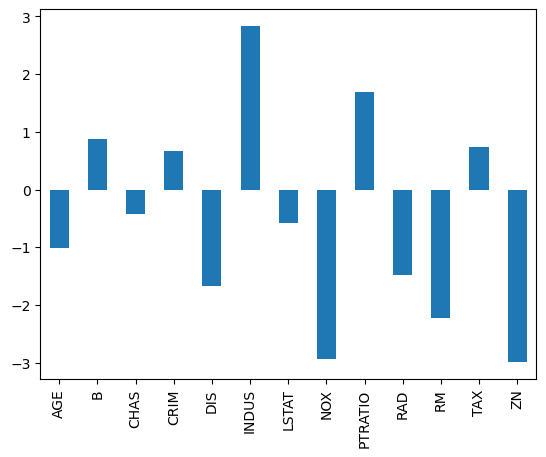

In [69]:
lm_coff.plot(kind="bar")

<Axes: >

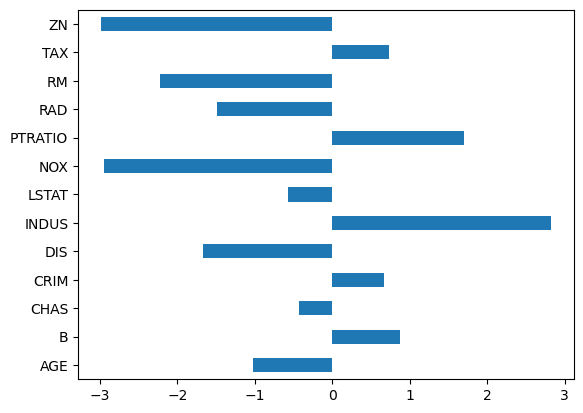

In [70]:
lm_coff.plot(kind="barh")  # h for horizontal bars

In [71]:
#Linear Regression RMSE and R2_Score
from sklearn.metrics import root_mean_squared_error,r2_score

rmse_train = root_mean_squared_error(y_train,lm.predict(X_train))
print("RMSE Training:", np.round(rmse_train,3))

score_train = r2_score(y_train,lm.predict(X_train))
print("R2 Score Training:", np.round(score_train,3))

rmse_test = root_mean_squared_error(y_test,lm.predict(X_test))
print("RMSE Testing:", np.round(rmse_test,3))

score_test = r2_score(y_test,lm.predict(X_test))
print("R2 Score Testing:", np.round(score_test,3))

RMSE Training: 4.474
R2 Score Training: 0.765
RMSE Testing: 6.039
R2 Score Testing: 0.552


## Ridge Algorithm

In [72]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train,y_train)

Ridge()

In [73]:
independent_feature_names = df.columns.difference(['Houseprice'])
rid_coff=pd.Series(rid.coef_,index=independent_feature_names)
rid_coff

AGE       -1.012514
B          0.861606
CHAS      -0.438972
CRIM       0.677475
DIS       -1.639949
INDUS      2.835631
LSTAT     -0.576526
NOX       -2.914017
PTRATIO    1.641537
RAD       -1.438257
RM        -2.214484
TAX        0.733675
ZN        -2.987701
dtype: float64

<Axes: >

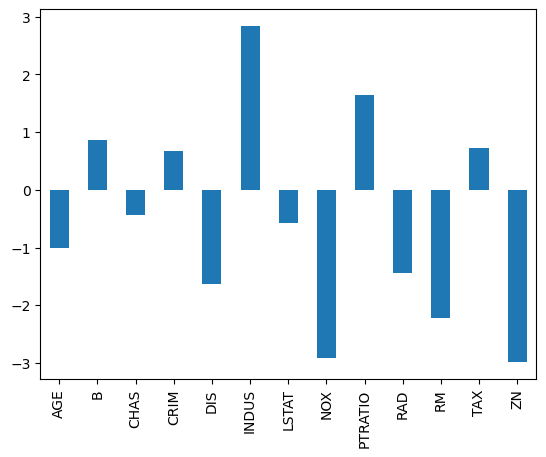

In [74]:
rid_coff.plot(kind="bar")

In [75]:
d1= pd.concat([lm_coff,rid_coff],axis=1)
print(d1)

                0         1
AGE     -1.021322 -1.012514
B        0.871762  0.861606
CHAS    -0.426335 -0.438972
CRIM     0.674165  0.677475
DIS     -1.668521 -1.639949
INDUS    2.830881  2.835631
LSTAT   -0.576253 -0.576526
NOX     -2.946585 -2.914017
PTRATIO  1.698452  1.641537
RAD     -1.485727 -1.438257
RM      -2.222710 -2.214484
TAX      0.734556  0.733675
ZN      -2.994442 -2.987701


## Lasso Algorithm

In [76]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(X_train,y_train)

Lasso()

In [77]:
independent_feature_names = df.columns.difference(['Houseprice'])
la_coff=pd.Series(la.coef_,index=independent_feature_names)
la_coff

AGE       -0.061682
B          0.000000
CHAS      -0.000000
CRIM       0.000000
DIS       -0.000000
INDUS      2.773493
LSTAT     -0.000000
NOX       -0.000000
PTRATIO   -0.000000
RAD       -0.375100
RM        -1.737872
TAX        0.120365
ZN        -3.191273
dtype: float64

<Axes: >

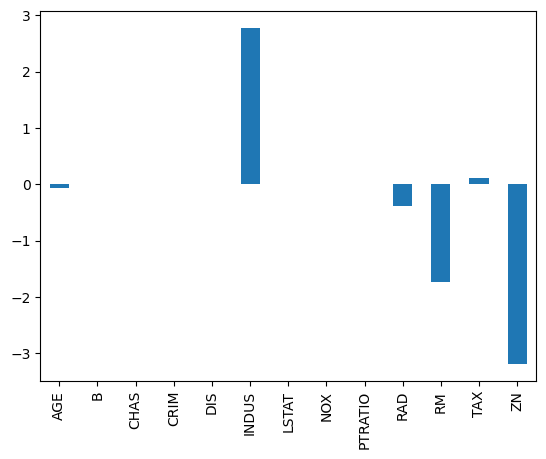

In [78]:
la_coff.plot(kind="bar")

In [79]:
d2= pd.concat([lm_coff,rid_coff,la_coff],axis=1)
print(d2)

                0         1         2
AGE     -1.021322 -1.012514 -0.061682
B        0.871762  0.861606  0.000000
CHAS    -0.426335 -0.438972 -0.000000
CRIM     0.674165  0.677475  0.000000
DIS     -1.668521 -1.639949 -0.000000
INDUS    2.830881  2.835631  2.773493
LSTAT   -0.576253 -0.576526 -0.000000
NOX     -2.946585 -2.914017 -0.000000
PTRATIO  1.698452  1.641537 -0.000000
RAD     -1.485727 -1.438257 -0.375100
RM      -2.222710 -2.214484 -1.737872
TAX      0.734556  0.733675  0.120365
ZN      -2.994442 -2.987701 -3.191273


In [80]:
d2_clean= d2[(d2 != 0).all(axis = 1)]
d2_clean

,0,1,2
AGE,-1.021322,-1.012514,-0.061682
INDUS,2.830881,2.835631,2.773493
RAD,-1.485727,-1.438257,-0.375100
RM,-2.222710,-2.214484,-1.737872
TAX,0.734556,0.733675,0.120365
ZN,-2.994442,-2.987701,-3.191273


In [81]:
d2_clean= d2_clean.drop(columns=[0,1])
d2_clean

,2
AGE,-0.061682
INDUS,2.773493
RAD,-0.375100
RM,-1.737872
TAX,0.120365
ZN,-3.191273


## Elastic Net

- Elastic Net Regression is a powerful linear regression technique that combines the penalties of both Lasso and Ridge regression. 

In [82]:
from sklearn.linear_model import ElasticNet
elnet=ElasticNet()
elnet.fit(X_train,y_train)

ElasticNet()

In [83]:
independent_feature_names = df.columns.difference(['Houseprice'])
elnet_coff=pd.Series(elnet.coef_,index=independent_feature_names)
elnet_coff

AGE       -0.445865
B          0.231240
CHAS      -0.400388
CRIM       0.394923
DIS       -0.226760
INDUS      2.321711
LSTAT     -0.120943
NOX       -0.000000
PTRATIO   -0.000000
RAD       -0.484025
RM        -1.499701
TAX        0.443072
ZN        -2.103115
dtype: float64

<Axes: >

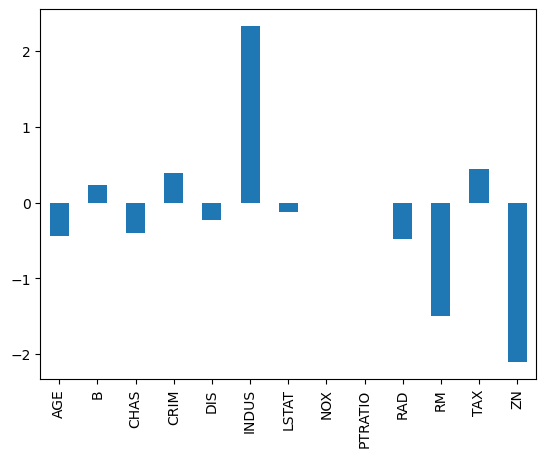

In [84]:
elnet_coff.plot(kind="bar")

In [88]:
d3= pd.concat([lm_coff,rid_coff,la_coff,elnet_coff],axis=1)
d3.columns=['MLR','Ridge','Lasso','ElasticNet']
print(d3)

              MLR     Ridge     Lasso  ElasticNet
AGE     -1.021322 -1.012514 -0.061682   -0.445865
B        0.871762  0.861606  0.000000    0.231240
CHAS    -0.426335 -0.438972 -0.000000   -0.400388
CRIM     0.674165  0.677475  0.000000    0.394923
DIS     -1.668521 -1.639949 -0.000000   -0.226760
INDUS    2.830881  2.835631  2.773493    2.321711
LSTAT   -0.576253 -0.576526 -0.000000   -0.120943
NOX     -2.946585 -2.914017 -0.000000   -0.000000
PTRATIO  1.698452  1.641537 -0.000000   -0.000000
RAD     -1.485727 -1.438257 -0.375100   -0.484025
RM      -2.222710 -2.214484 -1.737872   -1.499701
TAX      0.734556  0.733675  0.120365    0.443072
ZN      -2.994442 -2.987701 -3.191273   -2.103115
